In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
df = pd.read_csv("../data/Merged_Statistics_and_lifestyle.csv")

In [219]:
df.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Occupation,Sleep Duration,Stress Level,BMI Category,Blood Pressure,Heart Rate,Sleep Disorder
0,1,25,f,8,23:00,8000,2500,medium,healthy,no,no,Software Engineer,6.1,6,Overweight,126/83,77,NaN
1,2,34,m,7,00:30,5000,2200,low,unhealthy,yes,yes,Doctor,6.2,8,Normal,125/80,75,NaN
2,3,29,f,9,22:45,9000,2700,high,healthy,no,no,Doctor,6.2,8,Normal,125/80,75,NaN
3,4,41,m,5,01:00,4000,2100,low,unhealthy,yes,no,Sales Representative,5.9,8,Obese,140/90,85,Sleep Apnea
4,5,22,f,8,23:30,10000,2800,high,medium,no,no,Sales Representative,5.9,8,Obese,140/90,85,Sleep Apnea


**Conservar solo la hora, de 'Bedtime'**

In [220]:
df['Bedtime'] = pd.to_datetime(df['Bedtime'], format='%H:%M').dt.hour

**Separar la presión arterial de una persona en presión sistólica y presión diastólica.**

In [221]:
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(float)
df.drop(columns=['Blood Pressure'], inplace=True)

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User ID                  100 non-null    int64  
 1   Age                      100 non-null    int64  
 2   Gender                   100 non-null    object 
 3   Sleep Quality            100 non-null    int64  
 4   Bedtime                  100 non-null    int32  
 5   Daily Steps              100 non-null    int64  
 6   Calories Burned          100 non-null    int64  
 7   Physical Activity Level  100 non-null    object 
 8   Dietary Habits           100 non-null    object 
 9   Sleep Disorders          100 non-null    object 
 10  Medication Usage         100 non-null    object 
 11  Occupation               100 non-null    object 
 12  Sleep Duration           100 non-null    float64
 13  Stress Level             100 non-null    int64  
 14  BMI Category             10

In [223]:
df.describe()

,User ID,Age,Sleep Quality,Bedtime,Daily Steps,Calories Burned,Sleep Duration,Stress Level,Heart Rate,Systolic_BP,Diastolic_BP
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,36.010000,7.000000,11.500000,6830.000000,2421.00000,6.871000,6.420000,71.610000,123.240000,80.640000
std,29.011492,8.454865,1.734964,11.066831,2498.706736,281.06759,0.766903,1.485145,4.240009,5.327876,3.118922
min,1.000000,22.000000,4.000000,0.000000,3000.000000,2000.00000,5.800000,3.000000,65.000000,115.000000,75.000000
25%,25.750000,28.750000,5.750000,0.750000,4750.000000,2175.00000,6.100000,6.000000,70.000000,120.000000,80.000000
50%,50.500000,35.000000,7.500000,11.500000,6750.000000,2400.00000,7.100000,6.000000,70.000000,120.000000,80.000000
75%,75.250000,44.000000,8.250000,22.250000,9000.000000,2700.00000,7.700000,8.000000,72.000000,125.000000,80.000000
max,100.000000,50.000000,9.000000,23.000000,11000.000000,2900.00000,7.900000,8.000000,85.000000,140.000000,90.000000


**Datos nulos**

In [224]:
df.isnull().sum()

User ID                     0
Age                         0
Gender                      0
Sleep Quality               0
Bedtime                     0
Daily Steps                 0
Calories Burned             0
Physical Activity Level     0
Dietary Habits              0
Sleep Disorders             0
Medication Usage            0
Occupation                  0
Sleep Duration              0
Stress Level                0
BMI Category                0
Heart Rate                  0
Sleep Disorder             85
Systolic_BP                 0
Diastolic_BP                0
dtype: int64

**Datos duplicados**

In [225]:
duplicated = df.duplicated(subset=['User ID'])
totalDuplicated = duplicated.sum()
print(f"Total de valores duplicados: {totalDuplicated}")

Total de valores duplicados: 0


In [226]:
df['User ID'] = df['User ID'].astype("string")

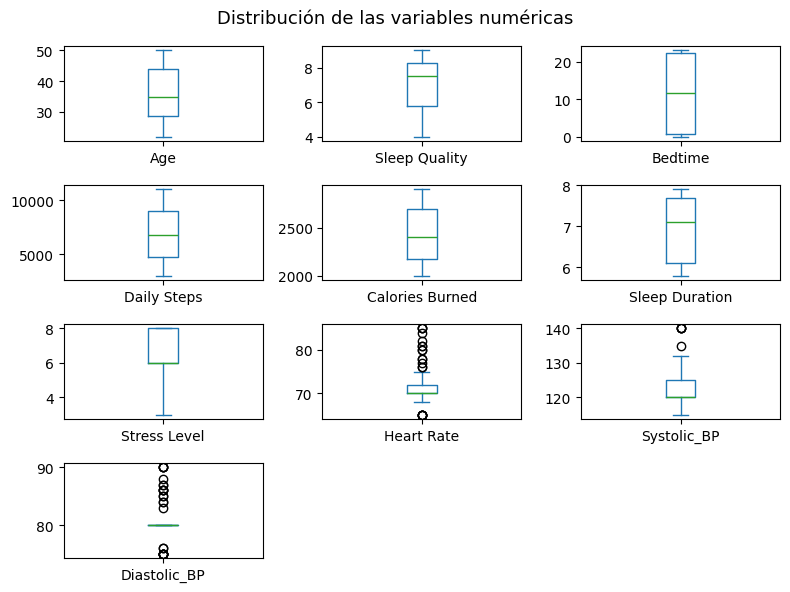

In [227]:
df.plot(kind='box', subplots=True, layout=(4, 3), figsize=(8, 6), sharex=False, sharey=False)
plt.suptitle("Distribución de las variables numéricas", fontsize=13)
plt.tight_layout()
plt.show()

In [228]:
def identifyOutliers(column: pd.Series):
    """
    Identifica y muestra los valores atípicos (outliers) de una columna numérica usando el método del rango intercuartílico (IQR).

    Parámetros:
    -----------
    column : pd.Series
        Serie de pandas que contiene los datos numéricos a analizar.

    Salidas:
    --------
    Imprime el número de outliers encontrados y una lista de los valores atípicos.
    """
    # Calcular cuartiles
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)

    # Rango intercuartílico
    ric = q3 - q1

    # Límites para detectar outliers
    high = q3 + 1.5 * ric
    low = q1 - 1.5 * ric

    # Filtrar outliers
    outliers = df[(column > high) | (column < low)]

    print(f"Número de outliers en {column.name}: {len(outliers)}")
    print(f"Outliers en {column.name}: {outliers[column.name].tolist()}")

In [229]:
for col in df.columns:
    if df[col].dtype in ['int64', 'float64', 'int32']:
        identifyOutliers(df[col])
        print(" ")

Número de outliers en Age: 0
Outliers en Age: []
 
Número de outliers en Sleep Quality: 0
Outliers en Sleep Quality: []
 
Número de outliers en Bedtime: 0
Outliers en Bedtime: []
 
Número de outliers en Daily Steps: 0
Outliers en Daily Steps: []
 
Número de outliers en Calories Burned: 0
Outliers en Calories Burned: []
 
Número de outliers en Sleep Duration: 0
Outliers en Sleep Duration: []
 
Número de outliers en Stress Level: 0
Outliers en Stress Level: []
 
Número de outliers en Heart Rate: 20
Outliers en Heart Rate: [77, 85, 85, 85, 82, 80, 80, 78, 78, 76, 76, 81, 81, 65, 65, 65, 65, 65, 65, 84]
 
Número de outliers en Systolic_BP: 5
Outliers en Systolic_BP: [140.0, 140.0, 140.0, 140.0, 135.0]
 
Número de outliers en Diastolic_BP: 25
Outliers en Diastolic_BP: [83.0, 90.0, 90.0, 90.0, 90.0, 87.0, 87.0, 86.0, 86.0, 76.0, 76.0, 85.0, 85.0, 86.0, 86.0, 84.0, 84.0, 75.0, 88.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0]
 


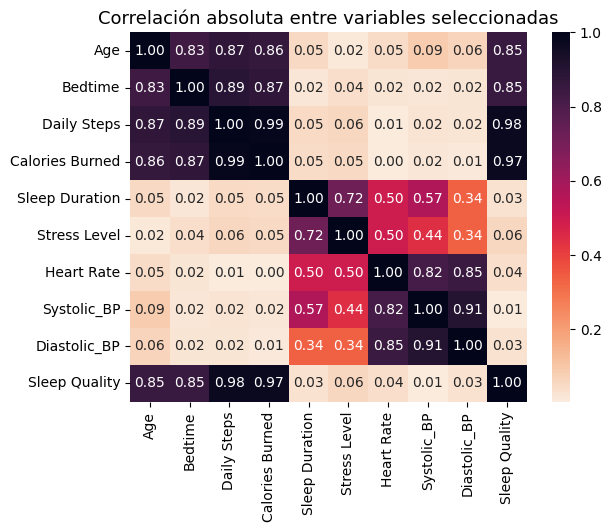

In [230]:
sns.heatmap(abs(df.iloc[:, [1, 4, 5, 6, 12, 13, 15, 17, 18, 3]].corr()), cmap="rocket_r", annot=True, fmt=".2f")
plt.title("Correlación absoluta entre variables seleccionadas", fontsize=13)
plt.show()

In [231]:
for col in df.columns[3:]:
    print(df[col].value_counts())

Sleep Quality
8    25
9    25
6    13
5    13
7    12
4    12
Name: count, dtype: int64
Bedtime
23    25
0     25
22    25
1     25
Name: count, dtype: int64
Daily Steps
8500     18
3000     12
9000     11
5000     11
9500     10
4000      9
6500      8
10000     5
6000      5
3500      4
10500     3
8000      1
11000     1
7000      1
5500      1
Name: count, dtype: int64
Calories Burned
2600    18
2100    13
2000    12
2200    11
2750    10
2400    10
2700     9
2500     5
2300     5
2900     4
2800     3
Name: count, dtype: int64
Physical Activity Level
medium    38
high      36
low       26
Name: count, dtype: int64
Dietary Habits
unhealthy    41
medium       30
healthy      29
Name: count, dtype: int64
Sleep Disorders
no     74
yes    26
Name: count, dtype: int64
Medication Usage
no     80
yes    20
Name: count, dtype: int64
Occupation
Doctor                  65
Engineer                 8
Accountant               6
Nurse                    5
Teacher                  5
Software Eng

**Indicador de rutina en base actividad física, sueño y salud**

In [ ]:
def calculateRoutineLevel(row) -> str:
    """
    Calcula el nivel de rutina diaria ('Low', 'Medium', 'High') 
    según indicadores de salud y hábitos, ajustando por edad y género.

    Parámetros:
    -----------
    row : pd.Series
        Fila del DataFrame con información de salud y estilo de vida.

    Retorna:
    --------
    str
        Nivel de rutina: 'Low', 'Medium' o 'High'.
    """
    score = 0
    # Tolerancia para ajustar la rutina según edad y género
    ageFactor = 0
    genderFactor = 0

    if row['Age'] < 30:
        ageFactor += 1.0
    elif row['Age'] < 60:
        ageFactor += 0.8
    else:
        ageFactor += 0.6

    if row['Gender'].lower() == 'm':
        genderFactor = 1.0
    else:
        genderFactor = 0.95

    tolerance = (ageFactor + genderFactor) / 2

    # Indicador de la rutina

    # Sleep Quality
    if row['Sleep Quality'] > 7:
        score += 2
    elif row['Sleep Quality'] >= 4:
        score += 1
    else:
        score += 0.5

    # Bedtime
    bedtime = row['Bedtime'] if row['Bedtime'] > 6 else row['Bedtime'] + 24

    if 21 <= bedtime < 23:
        score += 2
    elif 23 <= bedtime < 25:
        score += 1
    elif 25 <= bedtime < 27:
        score -= 0.5
    else:
        score -= 1 # muy tarde → desorden de sueño

    # Daily Steps
    if row['Daily Steps'] >= 10000:
        score += 2
    elif 5000 <= row['Daily Steps'] < 10000:
        score += 1
    else:
        score -= 0.5

    # Calories Burned
    if row['Calories Burned'] >= 2500:
        score += 2
    elif 1800 <= row['Calories Burned'] < 2500:
        score += 1
    else:
        score -= 0.5

    # Physical Activity Level
    if row['Physical Activity Level'].lower() == 'high':
        score += 2
    elif row['Physical Activity Level'].lower() == 'medium':
        score += 1
    else:
        score -= 0.5

    # Dietary Habits
    if row['Dietary Habits'].lower() == 'healthy':
        score += 2
    elif row['Dietary Habits'].lower() == 'medium':
        score += 1
    else:
        score -= 0.5

    # Sleep Disorders y Medication Usage
    if row['Sleep Disorders'].lower() == 'yes' and row['Medication Usage'].lower() == 'yes':
        score -= 2
    elif row['Sleep Disorders'].lower() == 'yes' or row['Medication Usage'].lower() == 'yes':
        score -= 1

    # Sleep Duration
    if 7 <= row['Sleep Duration'] <= 9:
        score += 2
    elif 5 <= row['Sleep Duration'] < 7:
        score += 1
    elif 9 < row['Sleep Duration'] <= 10:
        score += 0.5
    else:
        score -= 1 # sueño insuficiente o excesivo

    # Stress Level
    if row['Stress Level'] <= 3:
        score += 2
    elif 4 <= row['Stress Level'] <= 6:
        score += 0.5
    elif 7 <= row['Stress Level'] <= 8:
        score -= 1
    else:
        score -= 2 # estrés no tan normal

    # BMI Category
    if row['BMI Category'] in ['Normal', 'Normal Weight']:
        score += 2 
    elif row['BMI Category'] == 'Overweight':
        score += 0.5
    elif row['BMI Category'] == 'Obese':
        score -= 1

    # Heart Rate
    if 60 <= row['Heart Rate'] <= 80:
        score += 2
    elif 81 <= row['Heart Rate'] <= 90:
        score += 0.5
    elif row['Heart Rate'] < 60:
        score += 1
    else:
        score -= 1 # alta frecuencia → puede indicar estrés o bajo fitness

    # Blood Pressure
    if row['Systolic_BP'] < 120 and row['Diastolic_BP'] < 80:
        score += 2
    elif 120 <= row['Systolic_BP'] < 130 and row['Diastolic_BP'] < 80:
        score += 1
    elif 130 <= row['Systolic_BP'] < 140 or 80 <= row['Diastolic_BP'] < 90:
        score += 0
    else:
        score -= 1 # hipertensión → riesgo y afectación de rutina
    
    # Aplicar tolerancia
    score *= tolerance

    # Clasificación final
    if score >= 14:
        return 'High'
    elif score >= 6:
        return 'Medium'
    else:
        return 'Low'

In [234]:
df['Routine Level'] = df.apply(calculateRoutineLevel, axis=1)

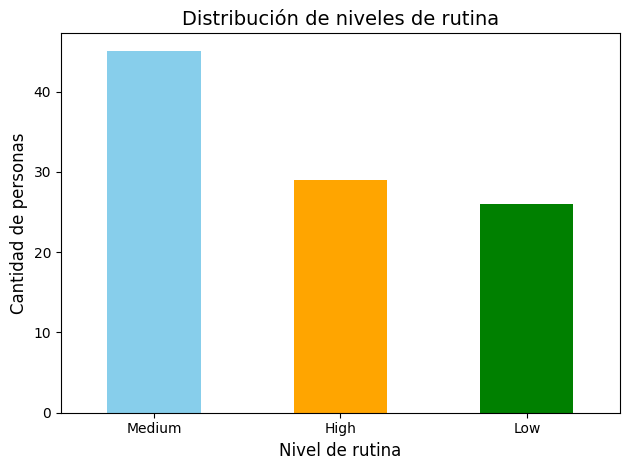

In [240]:
df['Routine Level'].value_counts().plot(kind="bar", color=['skyblue', 'orange', 'green'])
plt.title("Distribución de niveles de rutina", fontsize=14)
plt.xlabel("Nivel de rutina", fontsize=12)
plt.ylabel("Cantidad de personas", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()